In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
dataset_path = r"D:\shreedhar\Movies\sample1"

image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) 
               if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"Total images found: {len(image_files)}")

Total images found: 4


In [5]:
def add_gaussian_noise(img, mean=0, var=0.01):
    row, col, ch = img.shape
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(img/255 + gaussian, 0, 1)
    return (noisy * 255).astype(np.uint8)

def add_salt_pepper_noise(img, prob=0.02):
    noisy = np.copy(img)
    rnd = np.random.rand(*img.shape[:2])
    noisy[rnd < prob/2] = 0
    noisy[rnd > 1 - prob/2] = 255
    return noisy

def add_impulse_noise(img, prob=0.02):
    noisy = np.copy(img)
    rnd = np.random.rand(*img.shape[:2])
    mask = rnd < prob
    noisy[mask] = np.random.randint(0, 256, img.shape[2], dtype=np.uint8)
    return noisy

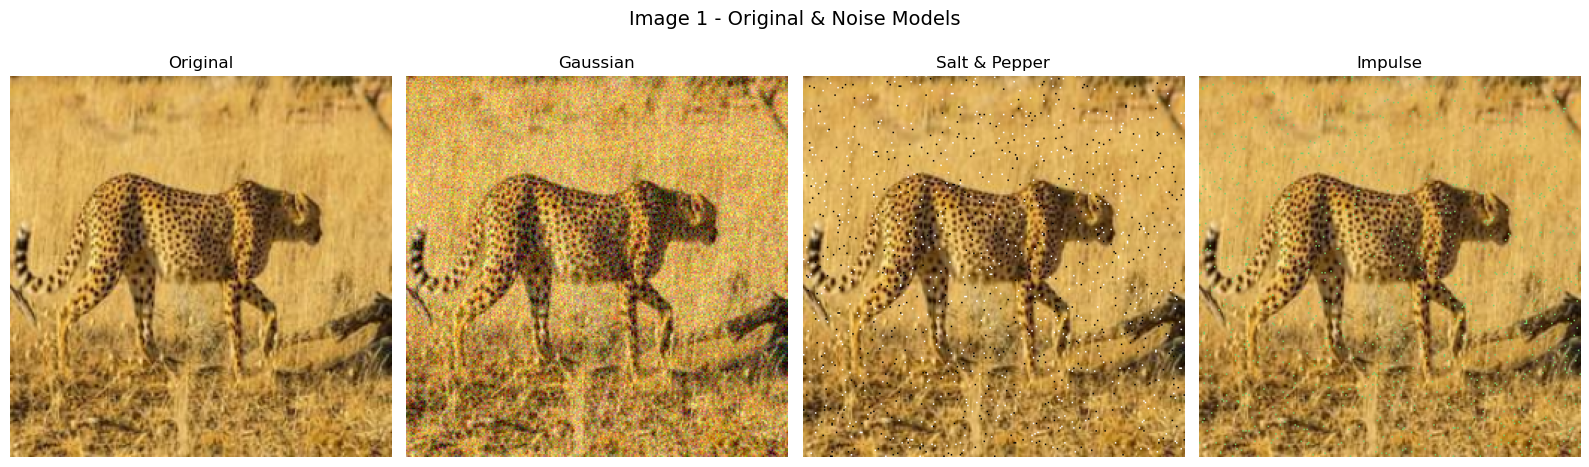

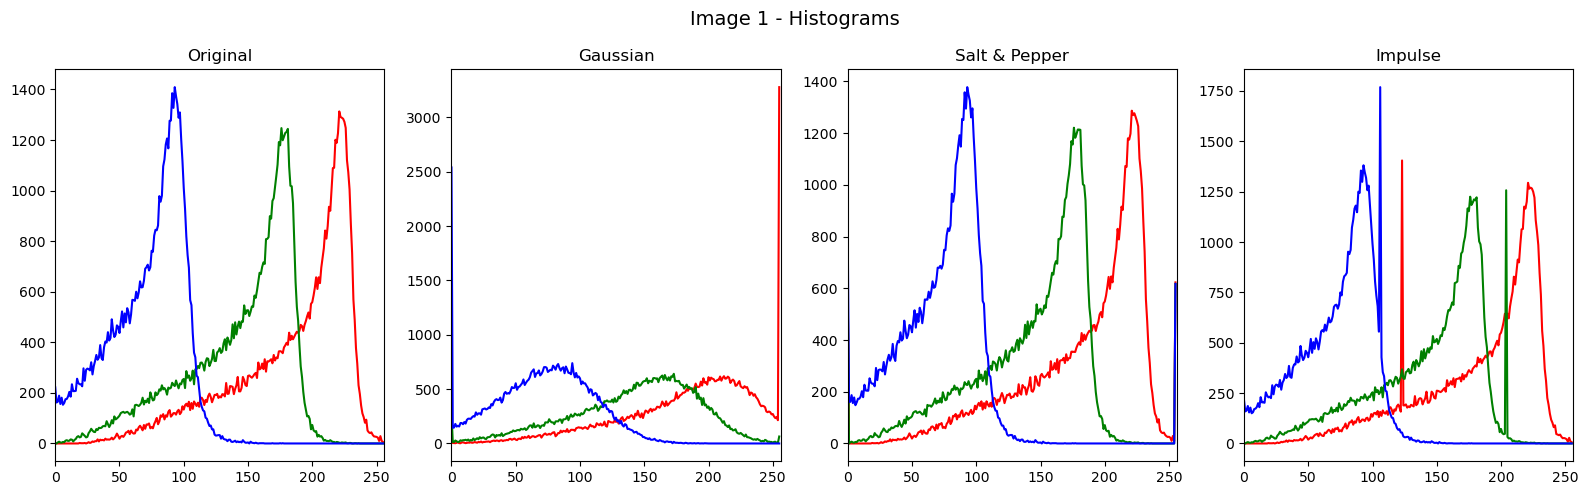

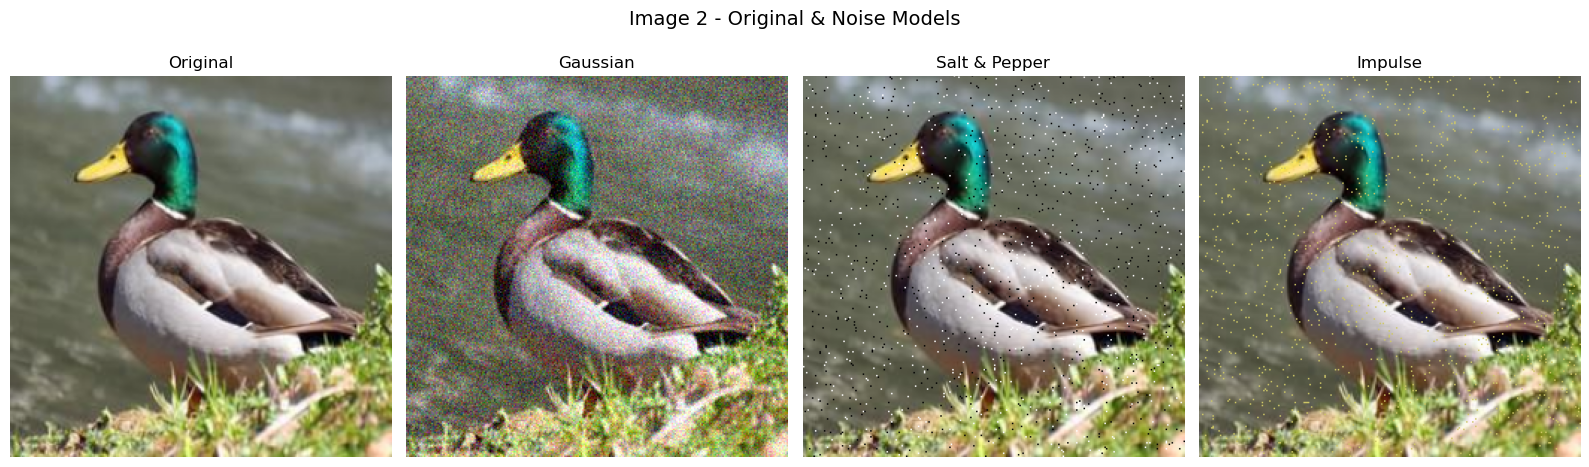

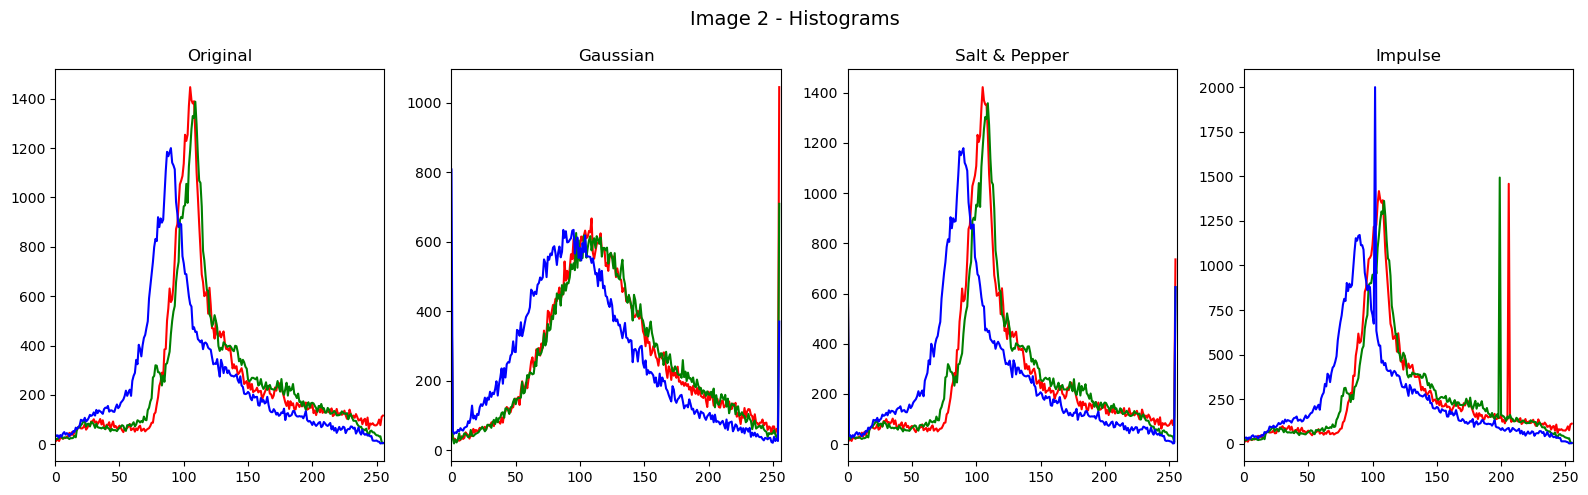

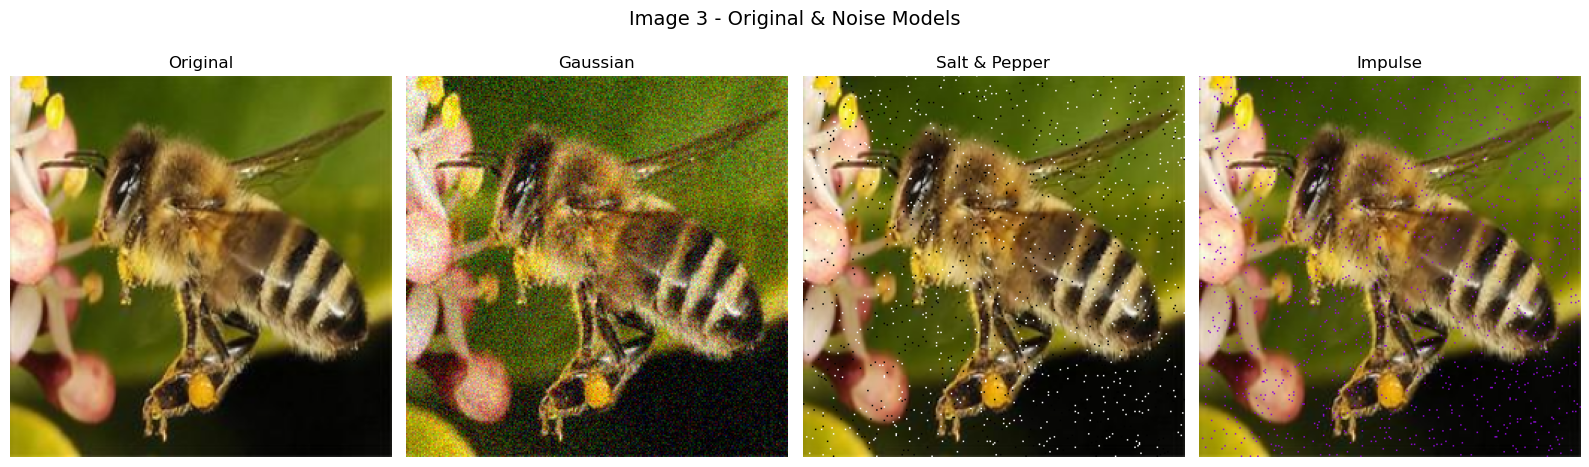

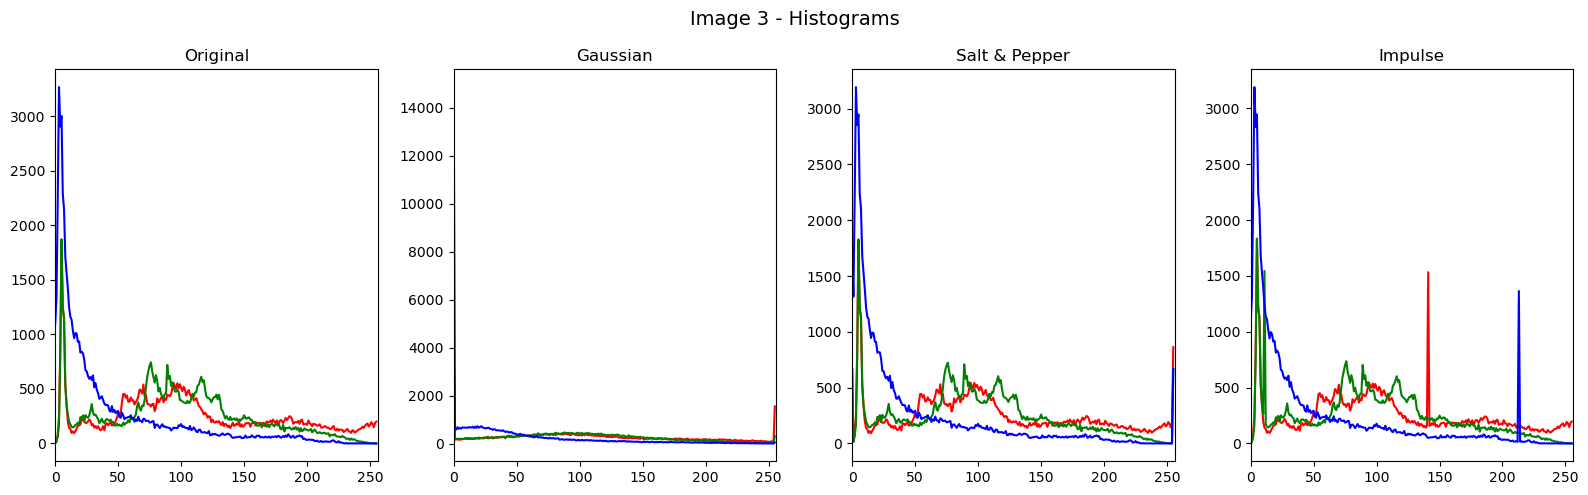

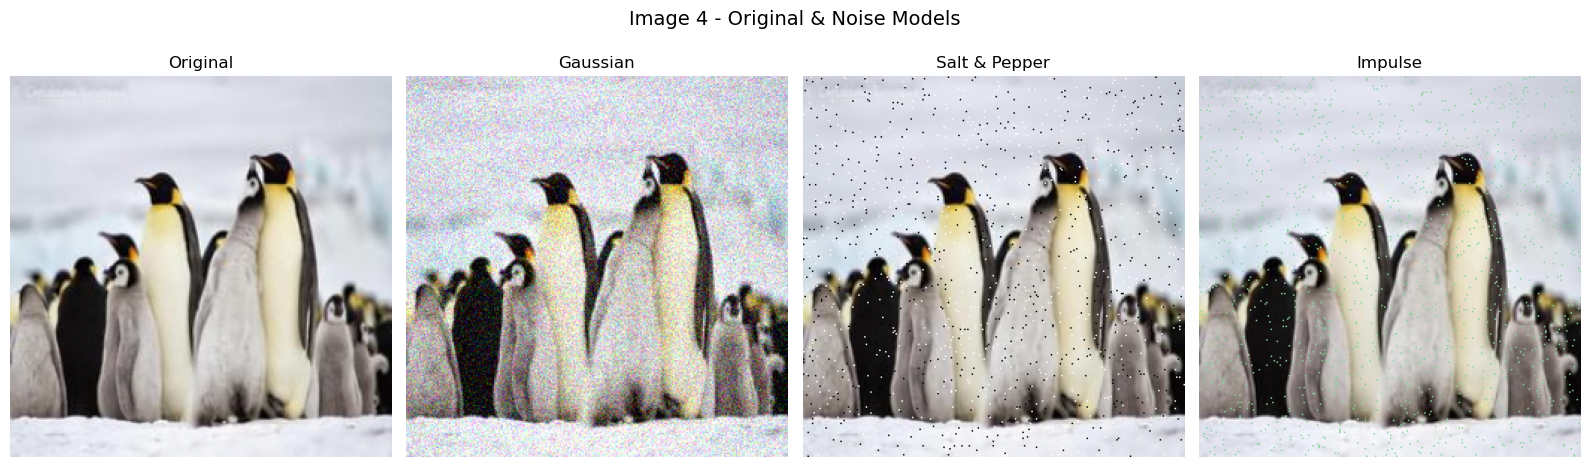

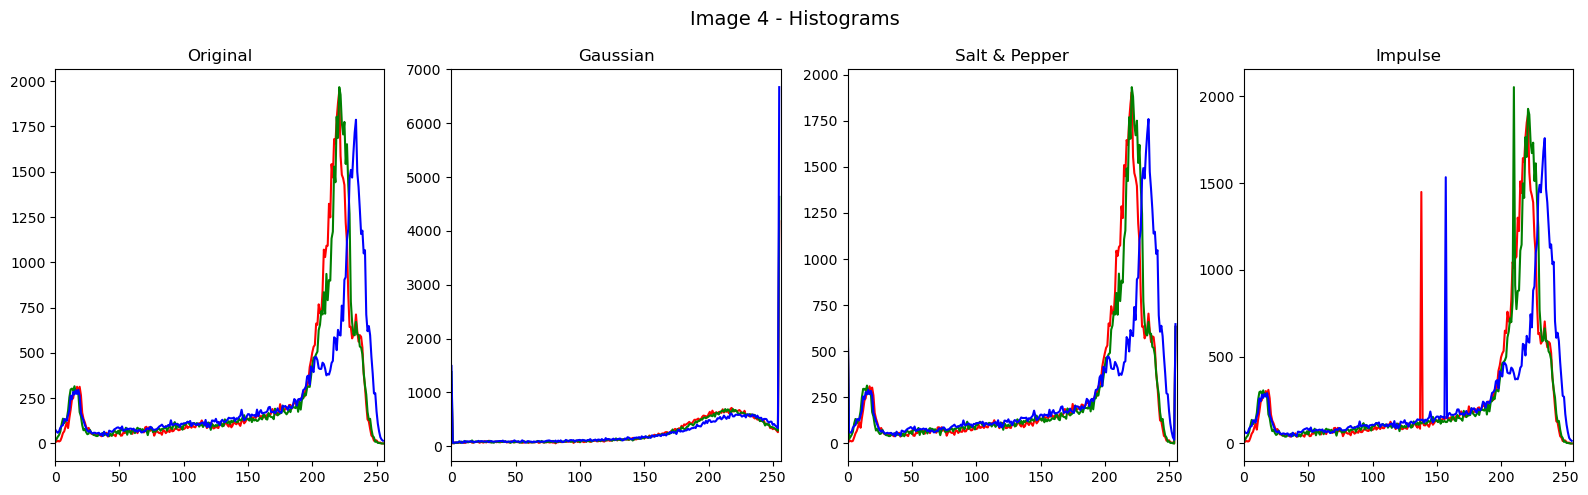

In [6]:
for idx, file in enumerate(image_files):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))

    gaussian_img = add_gaussian_noise(img)
    sp_img = add_salt_pepper_noise(img)
    impulse_img = add_impulse_noise(img)

    noisy_images = [("Original", img), ("Gaussian", gaussian_img),
                    ("Salt & Pepper", sp_img), ("Impulse", impulse_img)]

    fig1, axes1 = plt.subplots(1, 4, figsize=(16, 5))
    fig1.suptitle(f"Image {idx+1} - Original & Noise Models", fontsize=14)

    for i, (title, noisy_img) in enumerate(noisy_images):
        axes1[i].imshow(noisy_img)
        axes1[i].set_title(title)
        axes1[i].axis("off")

    plt.tight_layout()
    plt.show()

    fig2, axes2 = plt.subplots(1, 4, figsize=(16, 5))
    fig2.suptitle(f"Image {idx+1} - Histograms", fontsize=14)

    for i, (title, noisy_img) in enumerate(noisy_images):
        for j, col in enumerate(('r','g','b')):
            hist = cv2.calcHist([noisy_img],[j],None,[256],[0,256])
            axes2[i].plot(hist, color=col)
        axes2[i].set_xlim([0,256])
        axes2[i].set_title(title)

    plt.tight_layout()
    plt.show()
